# Decision Trees
<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we demonstrate the decision tree classifier algorithm and its hyperparameters!
    
* We draft a preliminary experiment.
* We analyse some of its hyperparameters.
</div>

## Data Acquisition

In [1]:
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
raw_data = digits.images
target = digits.target

## Initial Data Analysis

In [2]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (1797, 8, 8)
Target shape: (1797,)


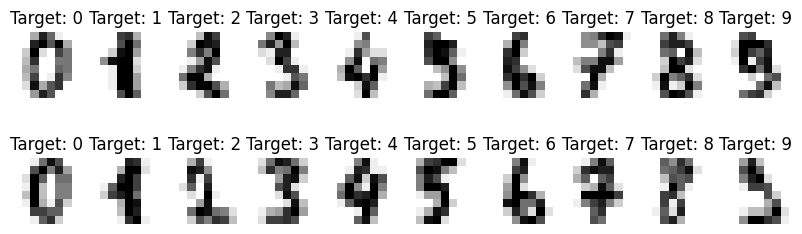

In [3]:
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), raw_data, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Target: %i' % label)



## Setup Experiment

### Preprocessing Data
Adapt the data to be manageable by the algorithms we want to use 

In [4]:
data = raw_data.reshape((len(raw_data), -1))
data.shape # first dimension as before, second and third have been reshaped

(1797, 64)

### Split data 2 ways
Create training, test, and validation data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, shuffle=True, stratify=target, random_state=42)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1078, 64) (1078,) (719, 64) (719,)


## Training (Machine Learning)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [8]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

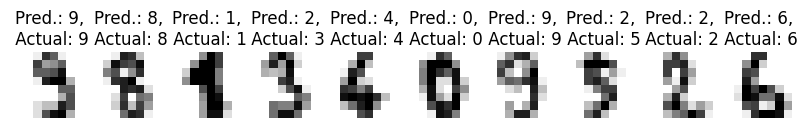

In [9]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction, actual in zip(axes, X_test, y_test_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred.: {prediction},\n Actual: {actual}')

In [10]:
print(round(metrics.accuracy_score(y_train, y_train_pred),5))
print(round(metrics.accuracy_score(y_test, y_test_pred),5))

1.0
0.84006


Observation: 
* The tree fits the training data well
* The performance on the unseen data (test data) is lower.
* This is an indication of overfitting.

In [11]:
print(clf.get_depth())
print(clf.get_n_leaves())

13
123


## Max Tree Depth Optimization
Let's try to increase the performance (decrease the overfitting) by restricting the tree size

In [17]:
accuracies=[]
# the best test-performance without pruning was achieved with depth=13, 
#thus use range until (excluding) 14
depths=range(1,14) 
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=depth)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, acc)
    accuracies.append(acc)
print(f'Maximum accuracy: {np.max(accuracies)} at max-depth={np.argmax(accuracies)+1}')


Maximum accuracy: 0.847009735744089 at max-depth=10


Text(0, 0.5, 'accuracy')

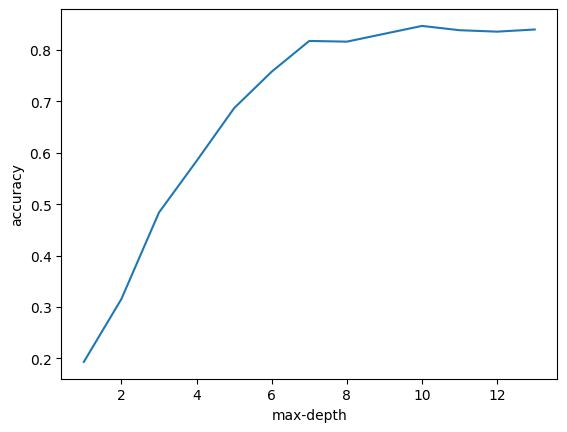

In [13]:
plt.plot(depths, accuracies)
plt.xlabel("max-depth")
plt.ylabel("accuracy")

The best tree depth in this case is 10. 

__NOTE__: This evaluation is preliminary (at best). To properly determine the best tree length we would usually use procedures with repetition (to smooth effects of random choices) and different datasets, i.e. different splits of the training data.

## Minimal Cost Pruning
Let's try to increase the performance by learning a tree and then pruning it:

In [20]:
accuracies=[]
alphas=np.arange(0,.001, 0.00001)
print(len(alphas))
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    accuracies.append(acc)
print(f'Maximum accuracy: {np.max(accuracies)} at alpha={alphas[np.argmax(accuracies)]}')

100


Maximum accuracy: 0.8400556328233658 at alpha=0.0


Text(0, 0.5, 'accuracy')

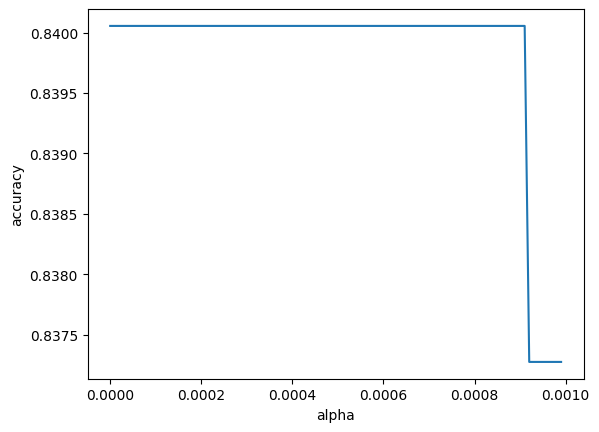

In [15]:
plt.plot(alphas, accuracies)
plt.xlabel("alpha")
plt.ylabel("accuracy")

In [16]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, ccp_alpha=0)
clf.fit(X_train, y_train)
clf.get_depth()

13

In this case, the pruning did not improve the performance.

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* running the decision trees algorithm
* overfitting
* influence of different techniques to minimize overfitting
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> The different methods to fight overfitting are hyperparameters of the approach.
</div>

<div class="alert alert-block alert-success">
<b>Play with:</b> 

* different parameters of the algorithm
* different random seeds
* different train test split ratios
</div>